Importing the packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2 as cv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the dataset directory

In [ ]:
train_dir="/content/drive/MyDrive/Datasets/DATASET/final/train/flip"
test_dir="/content/drive/MyDrive/Datasets/DATASET/final/test/flip"

In [ ]:
class_names=['BUMPS','HAIR LOSS','HOT SPOTS','RASHES','SORES']

Generating the Dataset to input it as the model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator()
test_datagen= ImageDataGenerator()
train_gen=train_datagen.flow_from_directory(train_dir,target_size=(128,128),batch_size=3)
val_gen=test_datagen.flow_from_directory(test_dir,target_size=(128,128),batch_size=1)

Found 469 images belonging to 5 classes.
Found 101 images belonging to 5 classes.


Importing the packages for creating the cnn model

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Input

In [ ]:
inputs = Input(shape=[128,128,3])

convo1=Conv2D(128,kernel_size=(3,3), padding="same",activation='relu',use_bias=True)(inputs)
convo1_pooling=MaxPooling2D((2, 2))(convo1)

convo2=(Conv2D(64, (3, 3), activation='relu',use_bias=True))(convo1_pooling)
convo2_pooling=(MaxPooling2D((2, 2)))(convo2)

convo3=(Conv2D(32, (3, 3), activation='relu',use_bias=True))(convo2_pooling)
convo3_pooling=(MaxPooling2D((2, 2)))(convo3)

convo4=(Conv2D(128, (3, 3), activation='relu',use_bias=True, kernel_regularizer =tf.keras.regularizers.l2( l=0.001)))(convo3_pooling)
convo4_pooling=(MaxPooling2D((2, 2)))(convo4)

flatten=layers.Flatten()(convo4_pooling)

hidden1=layers.Dense(256,activation='relu')(flatten)
hidden2=layers.Dense(128,activation='relu')(hidden1)
hidden3=layers.Dense(64,activation='relu')(hidden2)
concat_1=keras.layers.Concatenate()([hidden1,hidden3])
hidden4=layers.Dense(32,activation='relu')(concat_1)
hidden5=layers.Dense(64,activation='relu')(hidden4)
concat_2=keras.layers.Concatenate()([hidden4,hidden5])
hidden6=layers.Dense(128,activation='relu')(concat_2)
concat_3=keras.layers.Concatenate()([hidden2,hidden6])
hidden7=layers.Dense(64,activation='relu')(concat_3)
hidden8=layers.Dense(32,activation='relu')(hidden7)
output=layers.Dense(5,activation='softmax')(hidden8)
model=keras.models.Model(inputs=[inputs],outputs=[output])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 128, 128, 12  3584        ['input_5[0][0]']                
                                8)                                                                
                                                                                                  
 max_pooling2d_12 (MaxPooling2D  (None, 64, 64, 128)  0          ['conv2d_12[0][0]']              
 )                                                                                          

Compiling the model


In [ ]:
from tensorflow.keras import optimizers
#from keras.optimizers import Adam
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['acc'])

In [ ]:
checkpoint_cb= keras.callbacks.ModelCheckpoint("Bestmodel.h5",save_best_only=True)

In [ ]:
early_stop=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [ ]:
model_history=model.fit(train_gen,steps_per_epoch=30,epochs=100,validation_data=val_gen,validation_steps=15,callbacks=[checkpoint_cb])

Epoch 1/100
30/30 [==============================] - 46s 1s/step - loss: 2.2278 - acc: 0.2444 - val_loss: 1.6422 - val_acc: 0.2000
Epoch 2/100
30/30 [==============================] - 27s 906ms/step - loss: 1.6411 - acc: 0.2889 - val_loss: 1.7683 - val_acc: 0.2000
Epoch 3/100
30/30 [==============================] - 18s 598ms/step - loss: 1.6762 - acc: 0.2444 - val_loss: 1.6052 - val_acc: 0.4000
Epoch 4/100
30/30 [==============================] - 19s 635ms/step - loss: 1.6357 - acc: 0.2889 - val_loss: 2.0719 - val_acc: 0.2000
Epoch 5/100
30/30 [==============================] - 16s 535ms/step - loss: 1.6462 - acc: 0.2667 - val_loss: 1.8841 - val_acc: 0.1333
Epoch 6/100
30/30 [==============================] - 11s 373ms/step - loss: 1.6192 - acc: 0.2333 - val_loss: 1.7217 - val_acc: 0.2667
Epoch 7/100
30/30 [==============================] - 9s 293ms/step - loss: 1.6337 - acc: 0.3000 - val_loss: 1.5896 - val_acc: 0.1333
Epoch 8/100
30/30 [==============================] - 7s 244ms/step

(0.0, 1.0)

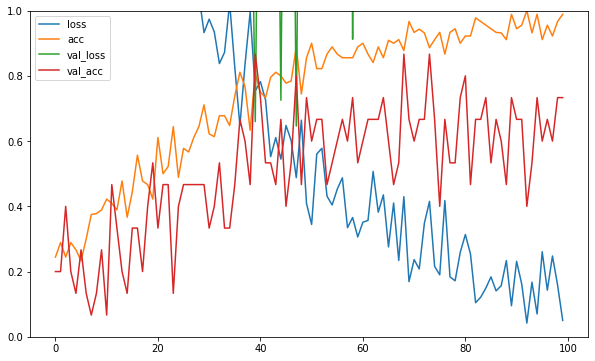

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=[10,6])
plt.gca().set_ylim(0,1)

Saving the model

In [ ]:
model.save('widen.h5')

Testing for an output

In [ ]:
image = cv.imread('/content/drive/MyDrive/Datasets/original/disease_test/RASHES/img2.jpg')

In [ ]:
image.shape

(194, 259, 3)

In [ ]:
from google.colab.patches import cv2_imshow

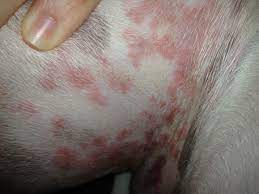

In [ ]:
cv2_imshow(image)

Resizing the user given input

In [ ]:
def crop_resize(img):
  image_1_resize = cv.resize(img,(128,128))
  return image_1_resize

In [ ]:
image=crop_resize(image)
image.shape

(128, 128, 3)

Expanding the dimensions to fit the model

In [ ]:
image = tf.expand_dims(image, axis=0)
image.shape.as_list()


[1, 128, 128, 3]

In [ ]:
yproba = model.predict(image)
yproba

1/1 [==============================] - 0s 155ms/step


array([[0.01780253, 0.22232889, 0.04436655, 0.7081135 , 0.0073885 ]],
      dtype=float32)

Predicting the class

In [ ]:
class_name=class_names[np.argmax(yproba,axis=1)[0]]

In [ ]:
class_name

'RASHES'